In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

https://www.kaggle.com/ravijeetkr/customer-life-time-value-prediction

In [2]:
df = pd.read_csv('cltv_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])
df['effective_to_month'] = df['Effective To Date'].dt.month
df['effective_to_year'] = df['Effective To Date'].dt.year

In [7]:
## Making date features categorical

df['effective_to_month'] = df['effective_to_month'].astype('string')
df['effective_to_year'] = df['effective_to_year'].astype('string')

In [8]:
categorical = df[['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Marital Status', 'Location Code', 'Policy', 'Policy Type', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'effective_to_month', 'effective_to_year']].copy()

In [9]:
categorical.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Marital Status,Location Code,Policy,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,effective_to_month,effective_to_year
0,Washington,No,Basic,Bachelor,Employed,F,Married,Suburban,Corporate L3,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,2,2011
1,Arizona,No,Extended,Bachelor,Unemployed,F,Single,Suburban,Personal L3,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,1,2011
2,Nevada,No,Premium,Bachelor,Employed,F,Married,Suburban,Personal L3,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,2,2011
3,California,No,Basic,Bachelor,Unemployed,M,Married,Suburban,Corporate L2,Corporate Auto,Offer1,Call Center,SUV,Medsize,1,2011
4,Washington,No,Basic,Bachelor,Employed,M,Single,Rural,Personal L1,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,2,2011


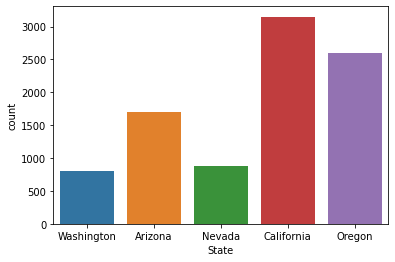

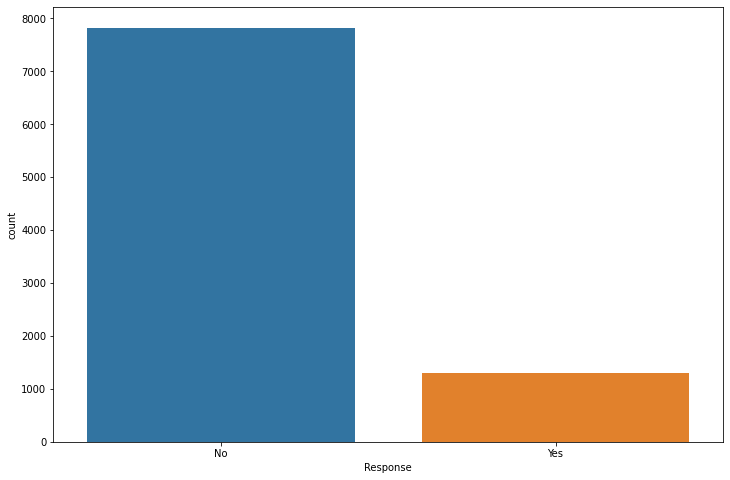

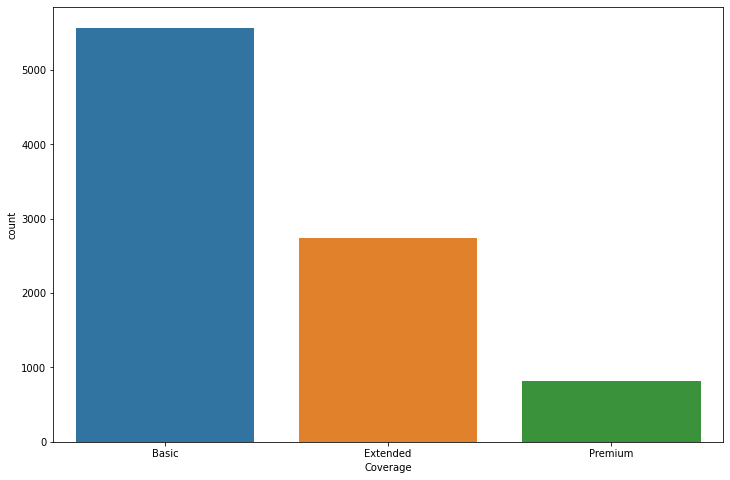

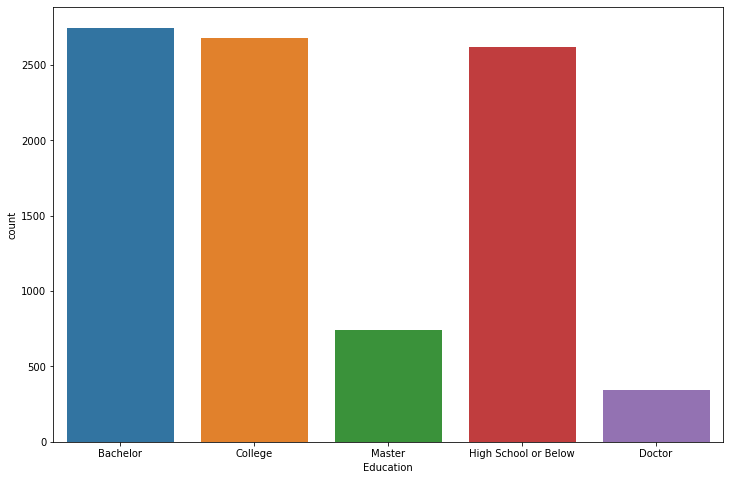

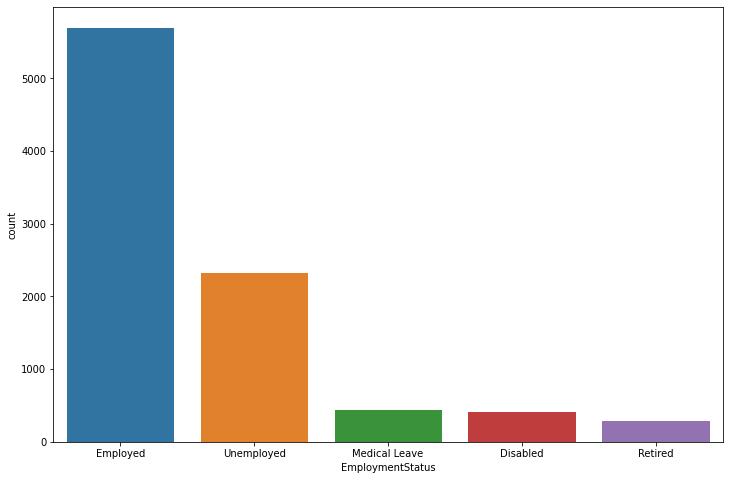

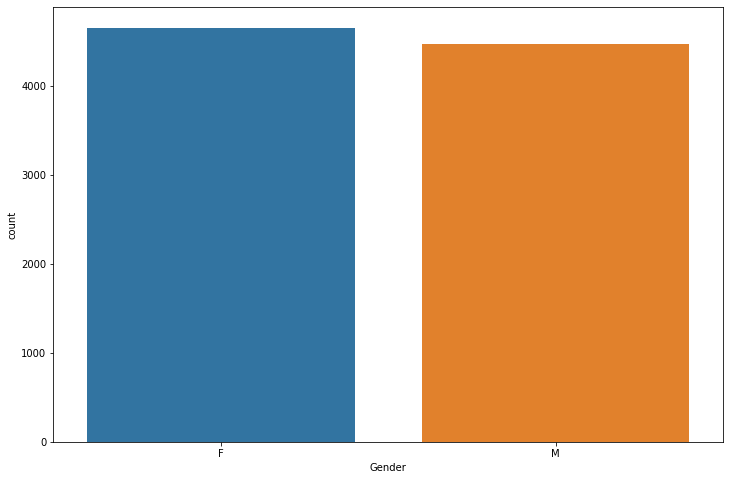

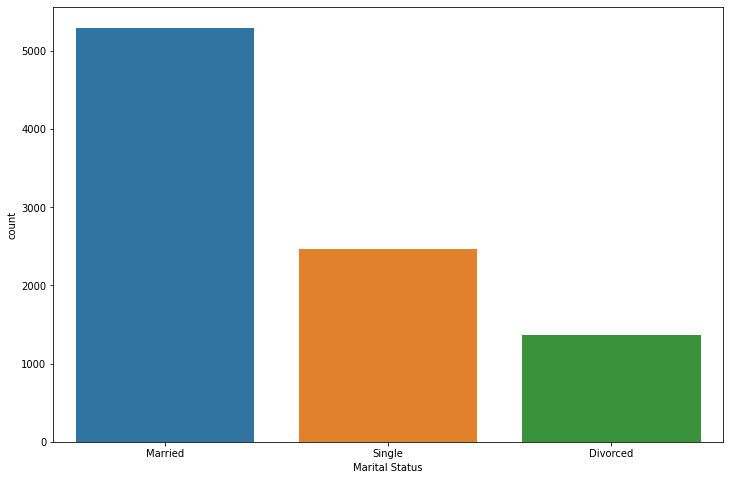

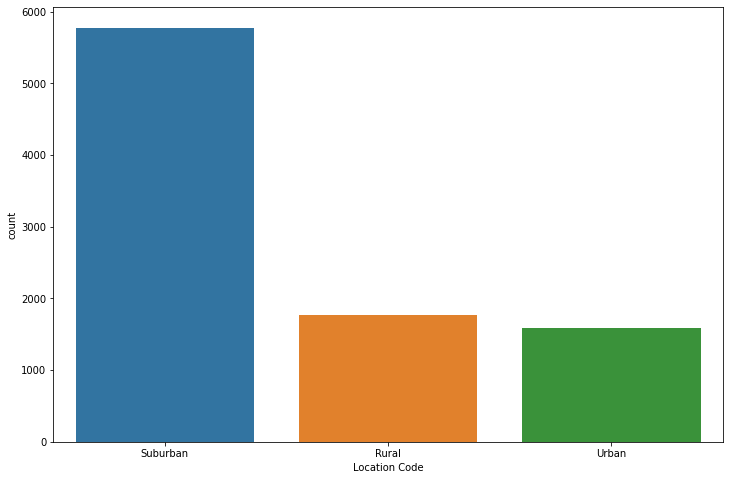

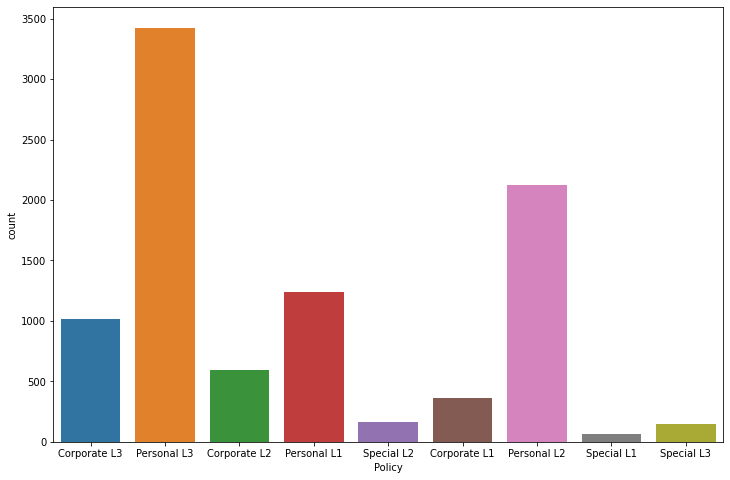

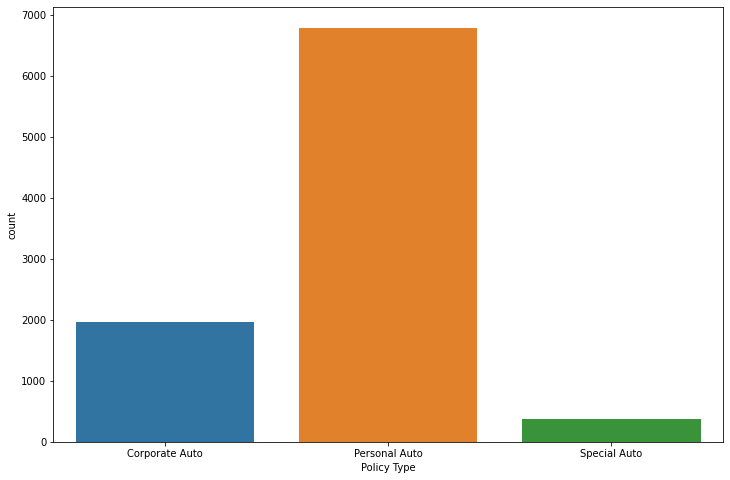

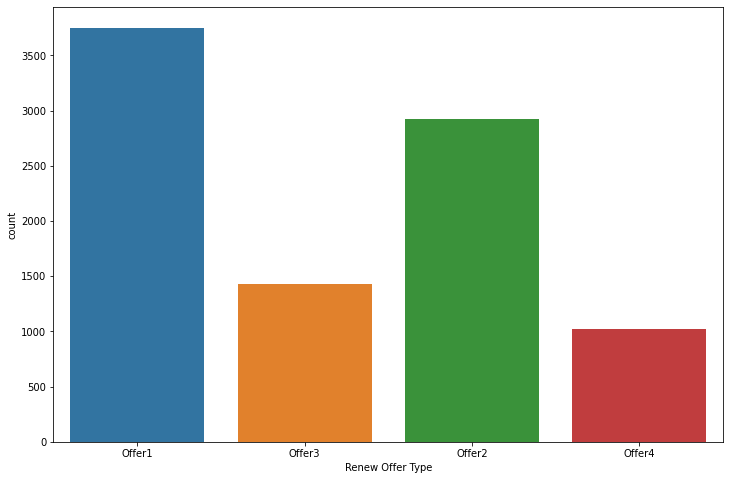

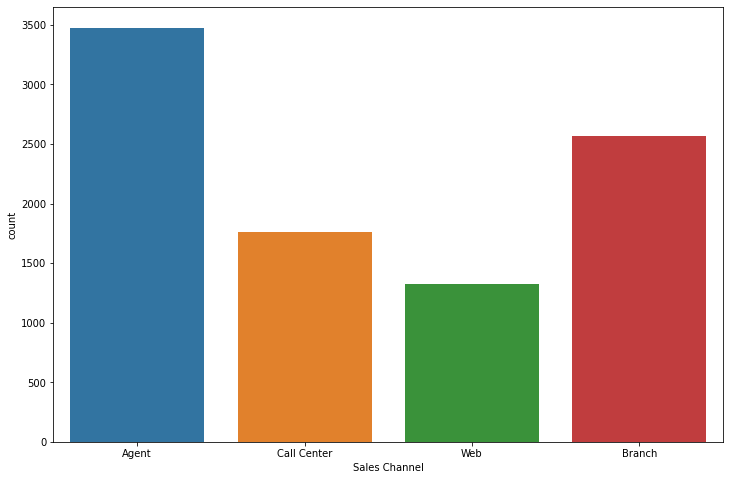

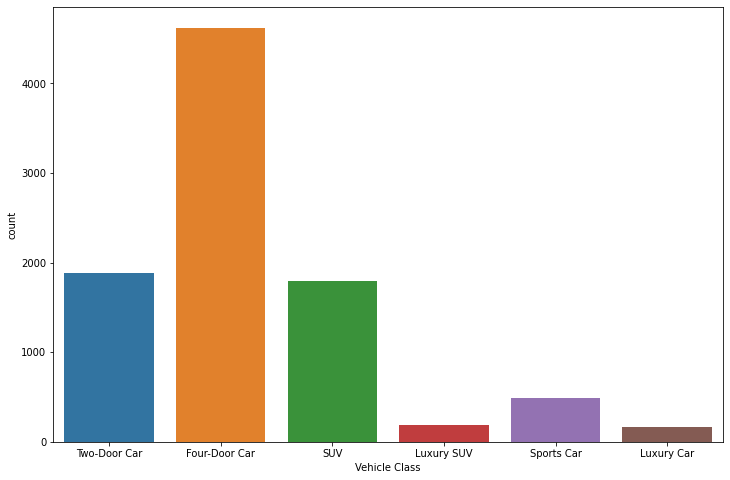

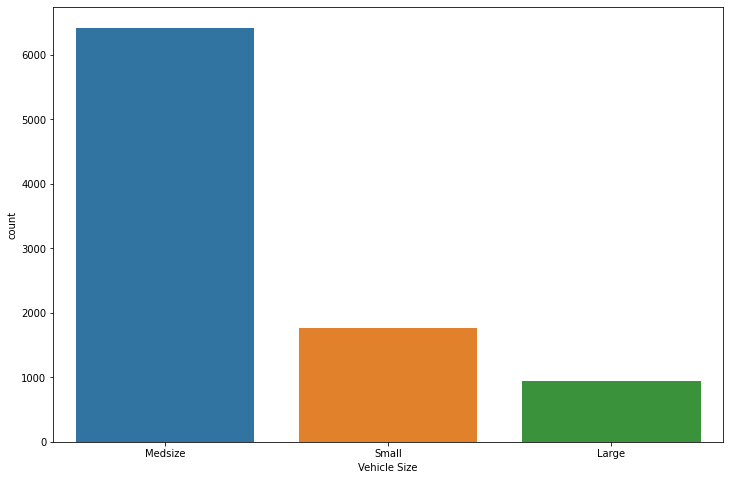

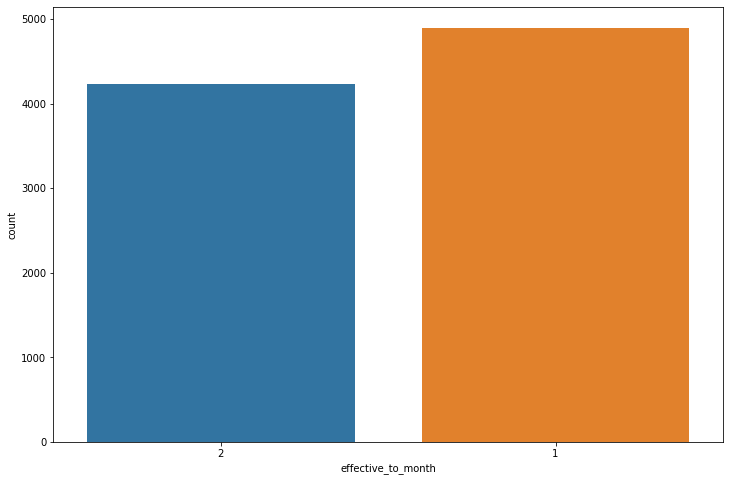

<Figure size 864x576 with 0 Axes>

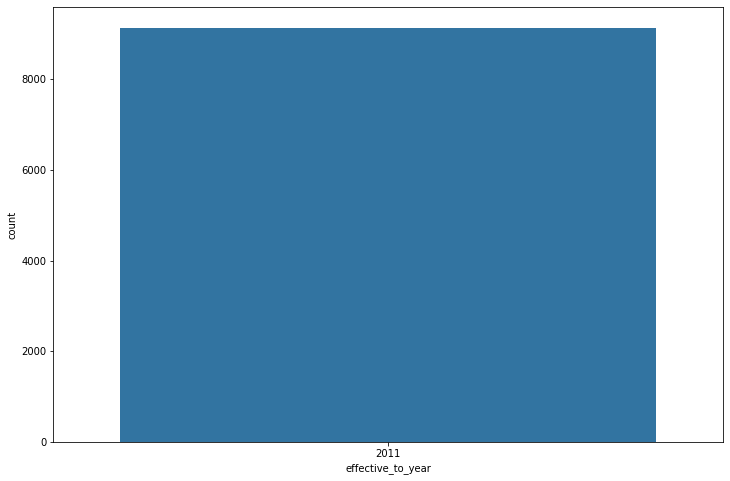

In [10]:
for i, col in enumerate(categorical.columns):  
    plt.figure(figsize=(12,8))
    plt.figure(i)
    sns.countplot(x=col, data=categorical)

## Handling Skewness

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

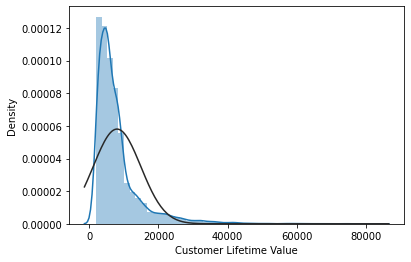

In [11]:
from scipy import stats
from scipy.stats import norm,skew

sns.distplot(df['Customer Lifetime Value'],fit=norm)

In [12]:
(mu,sigma) = norm.fit(df['Customer Lifetime Value'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))
print('skewness before transformation:',df['Customer Lifetime Value'].skew())

mu = 8004.94 and sigma = 6870.59
skewness before transformation: 3.0322802599299847


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
mu = 8.75 and sigma = 0.65


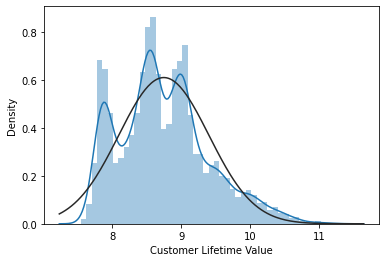

In [13]:
df['Customer Lifetime Value'] = np.log1p(df['Customer Lifetime Value'])
sns.distplot(df['Customer Lifetime Value'],fit=norm)

(mu,sigma) = norm.fit(df['Customer Lifetime Value'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

In [14]:
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))
print('skewness before transformation:',df['Customer Lifetime Value'].skew())

mu = 8.75 and sigma = 0.65
skewness before transformation: 0.5761717967456804


## Predictor Matrix

In [15]:
## Create Pred Matrix and Normalize

y = df.pop('Customer Lifetime Value')

X = df.copy()
X = X.drop('Effective To Date', axis=1)
X = X.drop('Customer', axis=1)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Response                       9134 non-null   object 
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   EmploymentStatus               9134 non-null   object 
 5   Gender                         9134 non-null   object 
 6   Income                         9134 non-null   int64  
 7   Location Code                  9134 non-null   object 
 8   Marital Status                 9134 non-null   object 
 9   Monthly Premium Auto           9134 non-null   int64  
 10  Months Since Last Claim        9134 non-null   int64  
 11  Months Since Policy Inception  9134 non-null   int64  
 12  Number of Open Complaints      9134 non-null   i

In [17]:
X = X.drop('Monthly Premium Auto', axis=1)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Response                       9134 non-null   object 
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   EmploymentStatus               9134 non-null   object 
 5   Gender                         9134 non-null   object 
 6   Income                         9134 non-null   int64  
 7   Location Code                  9134 non-null   object 
 8   Marital Status                 9134 non-null   object 
 9   Months Since Last Claim        9134 non-null   int64  
 10  Months Since Policy Inception  9134 non-null   int64  
 11  Number of Open Complaints      9134 non-null   int64  
 12  Number of Policies             9134 non-null   i

In [19]:
X = pd.get_dummies(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Colliniarity Check

In [22]:
X['effective_to_month'] = X['effective_to_month'].astype(int)
X['effective_to_year'] = X['effective_to_year'].astype(int)

In [23]:
X_vif = add_constant(X)

In [24]:
vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)

/root/venv/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/root/venv/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [25]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [26]:
print_full(vif)

Income                            3.182668
Months Since Last Claim           1.010230
Months Since Policy Inception     1.021980
Number of Open Complaints         1.009120
Number of Policies                1.019271
Total Claim Amount                4.137478
effective_to_month                1.006442
effective_to_year                 0.000000
State_Arizona                          inf
State_California                       inf
State_Nevada                           inf
State_Oregon                           inf
State_Washington                       inf
Response_No                            inf
Response_Yes                           inf
Coverage_Basic                         inf
Coverage_Extended                      inf
Coverage_Premium                       inf
Education_Bachelor                     inf
Education_College                      inf
Education_Doctor                       inf
Education_High School or Below         inf
Education_Master                       inf
EmploymentS

## Normalizing Data

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models

### Model 1 - Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg = LinearRegression().fit(X_train, y_train)
r2 = reg.score(X_test, y_test)

cv_scores = cross_val_score(reg, X_test, y_test, cv=5)
print("Your r2 Test Score is: ", r2)
print("Your CV Scores are: ", cv_scores)
print("Your Mean CV Score is: ", np.mean(cv_scores))

Your r2 Test Score is:  0.2556225132535189
Your CV Scores are:  [0.17256766 0.28157678 0.15999127 0.27916797 0.26899552]
Your Mean CV Score is:  0.23245984125402827


In [30]:
reg.predict(X_test[21].reshape(1, -1))

array([9.3125])

In [31]:
Xstd = scaler.fit_transform(X)
df['cltv_ground_truth'] = y

In [32]:
reg_full = LinearRegression().fit(Xstd, y)
reg_preds = reg_full.predict(Xstd)

In [33]:
y_pred = reg.predict(X_test)

ols_mae = mean_absolute_error(y_test, y_pred)
print(ols_mae)

0.4345503435130889


### Model 2 - ElasticNet + GridSearch

In [34]:
# Move import up top

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [35]:
model_enet = ElasticNet(alpha=0.1, l1_ratio=0.9)

model_enet.fit(X_train, y_train)
cv_score = cross_val_score(model_enet, X_train, y_train, cv=5)
mean_cv = np.mean(cross_val_score(model_enet, X_train, y_train, cv=5))
training_score = model_enet.score(X_train, y_train)
test_score = model_enet.score(X_test, y_test)

print("Training Score: ", training_score)
print("Cross validation scores: ", cv_score)
print("Your Mean CV Score: ", mean_cv)
print("Test Score: ", test_score)

Training Score:  0.0
Cross validation scores:  [-5.35723728e-04 -1.57781988e-03 -2.05769692e-04 -2.19798446e-09
 -7.09989889e-06]
Your Mean CV Score:  -0.00046528307848570094
Test Score:  -0.0008550870413079892


In [36]:
model_enet.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [37]:
# fill the dictionary of parameters
gs_params = {'l1_ratio': np.linspace(0, 1, 50), 'alpha': np.linspace(0, 1, 50)}

gridsearch = GridSearchCV(model_enet, gs_params, n_jobs=2, cv=5, verbose=2)

In [38]:
# Run gridsearch

#gridsearch.fit(X_train, y_train)

In [39]:
#print("The best parameters are %s with a score of %0.2f" % (gridsearch.best_params_, gridsearch.best_score_))

In [40]:
model_enet2 = ElasticNet(alpha=1.0, l1_ratio=1.0)

model_enet2.fit(X_train, y_train)
cv_score = cross_val_score(model_enet2, X_train, y_train, cv=5)
mean_cv = np.mean(cross_val_score(model_enet2, X_train, y_train, cv=5))
training_score = model_enet2.score(X_train, y_train)
test_score = model_enet2.score(X_test, y_test)

print("Training Score: ", training_score)
print("Cross validation scores: ", cv_score)
print("Your Mean CV Score: ", mean_cv)
print("Test Score: ", test_score)

Training Score:  0.0
Cross validation scores:  [-5.35723728e-04 -1.57781988e-03 -2.05769692e-04 -2.19798446e-09
 -7.09989889e-06]
Your Mean CV Score:  -0.00046528307848570094
Test Score:  -0.0008550870413079892


In [41]:
y_pred = model_enet2.predict(X_test)

model_enet_mae = mean_absolute_error(y_test, y_pred)
print(model_enet_mae)

0.5192142178821906


## Model 3 - Bayesian Ridge Regression

In [42]:
from sklearn import linear_model

bayreg = linear_model.BayesianRidge()

In [43]:
bayreg.fit(X_train, y_train)
cv_score = cross_val_score(bayreg, X_train, y_train, cv=5)
mean_cv = np.mean(cross_val_score(bayreg, X_train, y_train, cv=5))
training_score = bayreg.score(X_train, y_train)
test_score = bayreg.score(X_test, y_test)

print("Training Score: ", training_score)
print("Cross validation scores: ", cv_score)
print("Your Mean CV Score: ", mean_cv)
print("Test Score: ", test_score)

Training Score:  0.25661063194381073
Cross validation scores:  [0.20854273 0.26685244 0.23414098 0.28628114 0.23513304]
Your Mean CV Score:  0.24619006588013043
Test Score:  0.25441613229687143


In [44]:
bayreg.get_params().keys()

dict_keys(['alpha_1', 'alpha_2', 'alpha_init', 'compute_score', 'copy_X', 'fit_intercept', 'lambda_1', 'lambda_2', 'lambda_init', 'n_iter', 'normalize', 'tol', 'verbose'])

In [45]:
# fill the dictionary of parameters
gs_params = {'alpha_1': np.linspace(0, 1, 20), 'alpha_2': np.linspace(0, 1, 20), 'lambda_1': np.linspace(0, 1, 20), 'lambda_2': np.linspace(0, 1, 20)}

gridsearch = GridSearchCV(bayreg, gs_params, n_jobs=-1, cv=5, verbose=2)

In [46]:
#gridsearch.fit(X_train, y_train)

https://scikit-learn.org/stable/modules/linear_model.html#orthogonal-matching-pursuit-omp

In [47]:
y_pred = bayreg.predict(X_test)

bayreg_mae = mean_absolute_error(y_test, y_pred)

In [48]:
print(bayreg_mae)

0.4362423408341359


## Model 4 - Passive Aggressive Regressor

In [49]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [50]:
pass_regr = PassiveAggressiveRegressor(max_iter=1000, random_state=0, tol=1e-7, C=1.0)
pass_regr.fit(X_train, y_train)


PassiveAggressiveRegressor(random_state=0, tol=1e-07)

In [51]:
print(pass_regr.coef_)

[ 0.0339331  -0.06153744 -0.14233789 -0.0254519   0.27181848  0.25362278
  0.04802778  0.          0.25957646  0.64333046  0.35857168  0.30645816
  0.28206418  0.80130893  1.04869202  0.55144714  0.57435747  0.72419635
  0.27063354  0.28103513  0.32230317  0.62628604  0.34974307  0.30745903
  0.43465237  0.4384724   0.12359288  0.54582426  1.03804655  0.8119544
  0.52075089  0.57771096  0.75153909  0.63792079  0.52036165  0.69171852
  0.58884924  0.64013199  0.62101973  0.29101693  0.07635076  0.22148155
  0.3725907   0.07913517  0.18840611  0.17419524  0.16909237  0.27773212
  0.6046888   0.38243255  0.5511745   0.3117051   0.09648938  0.72420901
  0.49828428  0.53101828 -0.28854454  0.68098945  1.00451827  0.51994081
  0.34937912 -0.41628217  0.70929793  0.52469208  0.61601095]


In [52]:
cv_score = cross_val_score(pass_regr, X_train, y_train, cv=5)
mean_cv = np.mean(cross_val_score(pass_regr, X_train, y_train, cv=5))
training_score = pass_regr.score(X_train, y_train)
test_score = pass_regr.score(X_test, y_test)

print("Training Score: ", training_score)
print("Cross validation scores: ", cv_score)
print("Your Mean CV Score: ", mean_cv)
print("Test Score: ", test_score)

Training Score:  -0.2748023486220905
Cross validation scores:  [-0.95855966 -0.72840657 -0.28424303 -0.12235568 -0.63786263]
Your Mean CV Score:  -0.5462855134323639
Test Score:  -0.30182962892711473


In [53]:
y_pred = pass_regr.predict(X_test)

passreg_mae = mean_absolute_error(y_test, y_pred)
print(passreg_mae)

0.5992840942582809


## Model 5 - Huber Regressor

In [54]:
from sklearn.linear_model import HuberRegressor

In [55]:
# Huber works very well with Outliers. This is the leading model - provide more context to Huber.

In [56]:
huber = HuberRegressor().fit(X_train, y_train)

y_pred = huber.predict(X_test)

huber_mae = mean_absolute_error(y_test, y_pred)
print(huber_mae)

0.42252324390582285


In [57]:
cv_score = cross_val_score(huber, X_train, y_train, cv=5)
mean_cv = np.mean(cross_val_score(huber, X_train, y_train, cv=5))
training_score = huber.score(X_train, y_train)
test_score = huber.score(X_test, y_test)

print("Training Score: ", training_score)
print("Cross validation scores: ", cv_score)
print("Your Mean CV Score: ", mean_cv)
print("Test Score: ", test_score)

Training Score:  0.20266153861729475
Cross validation scores:  [0.13854794 0.22874211 0.17830805 0.24179743 0.18824151]
Your Mean CV Score:  0.19512740865098574
Test Score:  0.20932819962610005


## Model 6 - Random Sample Consensus Regressor

In [58]:
from sklearn.linear_model import RANSACRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor

In [59]:
ransac_reg = RANSACRegressor(random_state=0, max_trials=1100).fit(X_train, y_train)

y_pred = ransac_reg.predict(X_test)

ransac_mae = mean_absolute_error(y_test, y_pred)
print(ransac_mae)

0.5164874737138411


## Model 7 - SGD Regressor

In [60]:
from sklearn.linear_model import SGDRegressor

In [61]:
sgd_reg = SGDRegressor(max_iter=3000, tol=None, penalty='elasticnet', l1_ratio=1, learning_rate='invscaling').fit(X_train, y_train)

y_pred = sgd_reg.predict(X_test)

sgd_mae = mean_absolute_error(y_test, y_pred)
print(sgd_mae)

0.4361169507953584


## Tensorflow Regressor

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [63]:
X_train[2].shape

(65,)

In [64]:
input_layer = Input(shape=(66,))
x1 = Dense(500, activation='linear')(input_layer)
x2 = Dense(500, activation='linear')(x1)
output = Dense(1, activation='linear')(x2)

regr_tf = Model(inputs=input_layer, outputs=output)

In [65]:
# Trying different model topologies to see which achieves better results

input_layer = Input(shape=(65,))
x1 = Dense(1000, activation='linear')(input_layer)
x2 = Dense(1000, activation='linear')(x1)
x3 = Dense(1000, activation='linear')(x2)
output = Dense(1, activation='linear')(x3)

regr_tf = Model(inputs=input_layer, outputs=output)

In [66]:
# Worth trying reduce_lr_on_plateau callback as well

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [67]:
regr_tf.compile(optimizer=opt, loss='mse', metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [68]:
#regr_tf.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

## Decision Tree Regressor

In [69]:
from sklearn import tree

In [70]:
clf = tree.DecisionTreeRegressor(max_depth=9)
clf = clf.fit(X_train, y_train)

In [71]:
clf.score(X_test, y_test)

0.8800781163182761

In [72]:
dtree_preds = clf.predict(X_test)

In [73]:
dtree_mae = mean_absolute_error(y_test, dtree_preds)
print(dtree_mae)

0.1326570536058522


## Catboost

In [74]:
from catboost import CatBoostRegressor
cat_boost = CatBoostRegressor(iterations = 100,
            learning_rate = 0.05,
            eval_metric = "R2",
            verbose = True)

In [75]:
cat_boost.fit(X_train,y_train)

0:	learn: 0.0822082	total: 73.7ms	remaining: 7.29s
1:	learn: 0.1484190	total: 82.2ms	remaining: 4.03s
2:	learn: 0.2099129	total: 89.9ms	remaining: 2.91s
3:	learn: 0.2651757	total: 106ms	remaining: 2.55s
4:	learn: 0.3183291	total: 118ms	remaining: 2.25s
5:	learn: 0.3665863	total: 130ms	remaining: 2.04s
6:	learn: 0.4111612	total: 151ms	remaining: 2.01s
7:	learn: 0.4530988	total: 168ms	remaining: 1.93s
8:	learn: 0.4899552	total: 179ms	remaining: 1.81s
9:	learn: 0.5239271	total: 208ms	remaining: 1.87s
10:	learn: 0.5558757	total: 231ms	remaining: 1.86s
11:	learn: 0.5862084	total: 251ms	remaining: 1.84s
12:	learn: 0.6127278	total: 277ms	remaining: 1.85s
13:	learn: 0.6376955	total: 287ms	remaining: 1.76s
14:	learn: 0.6570363	total: 301ms	remaining: 1.71s
15:	learn: 0.6771775	total: 315ms	remaining: 1.65s
16:	learn: 0.6958797	total: 320ms	remaining: 1.56s
17:	learn: 0.7132368	total: 337ms	remaining: 1.53s
18:	learn: 0.7276992	total: 344ms	remaining: 1.47s
19:	learn: 0.7400074	total: 360ms	rema

In [76]:
cat_boost.score(X_train, y_train)

0.8983222489491496

In [77]:
cat_boost.score(X_test, y_test)

0.8918652087047896

In [78]:
cat_boost_preds = cat_boost.predict(X_test)

cat_boost_mae = mean_absolute_error(y_test, cat_boost_preds)
print(cat_boost_mae)

0.13070163018611394


## Model Analysis

In [79]:
test_scores = pd.DataFrame({'ols': ols_mae,
'elasticnet': model_enet_mae,
'bayesian_reg': bayreg_mae,
'pass_agg': passreg_mae,
'huber': huber_mae,
'ransac' : ransac_mae,
'sgd' : sgd_mae,
'decision_tree' : dtree_mae,
'catboost' : cat_boost_mae},
index=['Mean_Absolute_Errors'])

In [80]:
test_scores

,ols,elasticnet,bayesian_reg,pass_agg,huber,ransac,sgd,decision_tree,catboost
Mean_Absolute_Errors,0.43455,0.519214,0.436242,0.599284,0.422523,0.516487,0.436117,0.132657,0.130702


In [81]:
test_scores = test_scores.T

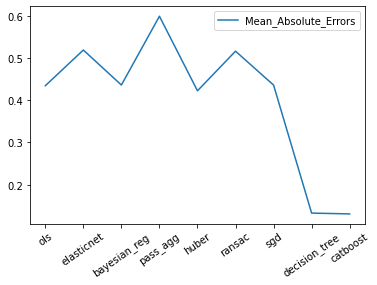

In [82]:
test_scores.plot()
plt.xticks(rotation=35)
plt.show()

In [83]:
#clf.coef_

clf.feature_importances_

array([8.05460420e-03, 6.23593354e-03, 2.26833188e-03, 8.86382931e-04,
       7.37411050e-01, 6.41283282e-02, 4.88918872e-06, 0.00000000e+00,
       1.26689323e-05, 9.47591527e-06, 2.98766711e-04, 3.75750249e-07,
       1.51190226e-04, 1.52598762e-03, 2.28737749e-03, 3.75149794e-02,
       1.40068277e-03, 8.78040750e-03, 3.88486515e-06, 2.52187479e-05,
       3.10057113e-04, 8.18602893e-05, 2.19694798e-06, 0.00000000e+00,
       2.60166632e-03, 1.48510464e-04, 6.65104484e-06, 6.54756253e-04,
       4.00004864e-05, 3.60657974e-04, 2.86394893e-04, 1.38442041e-03,
       0.00000000e+00, 5.27448957e-07, 7.99849970e-04, 1.35891283e-04,
       3.45790471e-04, 1.17530447e-05, 0.00000000e+00, 2.80455266e-04,
       0.00000000e+00, 4.25532019e-06, 3.23376890e-04, 6.23228822e-05,
       4.85110738e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.63766629e-04, 2.11050919e-04, 4.18939268e-04, 3.23220073e-04,
       1.78986295e-03, 2.38941995e-05, 3.83836031e-06, 1.32777436e-03,
      

In [84]:
cat_boost.feature_importances_

array([2.44916665e-01, 9.70798993e-02, 8.13010576e-02, 1.34679774e-01,
       7.83789265e+01, 2.03666211e+00, 0.00000000e+00, 0.00000000e+00,
       4.62390643e-03, 9.58305190e-03, 0.00000000e+00, 0.00000000e+00,
       2.26949367e-03, 5.73978755e-02, 2.04963839e-02, 3.13740505e+00,
       2.69440863e-02, 1.00792550e+00, 1.03993137e-02, 6.02414632e-03,
       3.43615357e-03, 9.79985935e-03, 0.00000000e+00, 0.00000000e+00,
       4.80477689e-01, 0.00000000e+00, 8.74367045e-03, 2.99994800e-01,
       3.70560580e-02, 6.84381913e-02, 1.66573180e-02, 8.70253877e-02,
       0.00000000e+00, 0.00000000e+00, 8.12645922e-02, 1.12270112e-01,
       5.83885263e-03, 0.00000000e+00, 0.00000000e+00, 1.06310459e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.66743368e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.78357955e-03, 2.22649059e-03, 4.51413604e-03,
       1.52188040e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [85]:
pass_agg_feat_imp = pd.DataFrame(data=pass_regr.coef_, index=X.columns, columns=["feature_importance"])

In [86]:
clf_feat_imp = pd.DataFrame(data=clf.feature_importances_, index=X.columns, columns=["feature_importance"])

In [87]:
catboost_feat_imp = pd.DataFrame(data=cat_boost.feature_importances_, index=X.columns, columns=["feature_importance"])

In [88]:
# Which variables move the needle on CLTV the most

catboost_feat_imp.sort_values(by="feature_importance")

,feature_importance
Location Code_Urban,0.000000
EmploymentStatus_Medical Leave,0.000000
Marital Status_Divorced,0.000000
Policy Type_Personal Auto,0.000000
Policy Type_Special Auto,0.000000
...,...
Vehicle Class_SUV,2.467751
Vehicle Class_Two-Door Car,2.980948
Coverage_Basic,3.137405
Vehicle Class_Four-Door Car,4.694799


## Best CLTV Preds

In [89]:
catboost_preds_full = cat_boost.predict(Xstd)
df['catboost_cltv_preds'] = catboost_preds_full
df

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,effective_to_month,effective_to_year,cltv_ground_truth,catboost_cltv_preds
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,2011,7.924622,7.948169
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,2011,8.850881,8.842695
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,2011,9.464085,9.679449
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,2011,8.942051,8.977389
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,2011,7.942608,7.901784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2,2011,10.060790,9.246754
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2,2011,8.038354,8.118965
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2,2011,9.007599,9.341350
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2,2011,8.926045,8.896183


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8fd894ed-7cb5-4f70-9097-b20c180a3837' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>